In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('RoG.dat',delimiter=' ',header=None)
df.columns = ['Time','Radius of Gyration (cm)','Total Mass','Number of segments']

In [96]:
display(df)

,Time,Radius of Gyration (cm),Total Mass,Number of segments
0,50,0.000895,7.032199e-10,2
1,100,0.000897,7.046395e-10,2
2,150,0.000900,7.069668e-10,2
3,200,0.000904,7.101895e-10,2
4,250,0.000909,7.142955e-10,2
...,...,...,...,...
3595,179800,0.057992,6.074613e-07,1160
3596,179850,0.058009,6.078927e-07,1161
3597,179900,0.058025,6.083250e-07,1162
3598,179950,0.058041,6.087580e-07,1162


In [172]:
df['Time'] = df['Time']/(60*60)

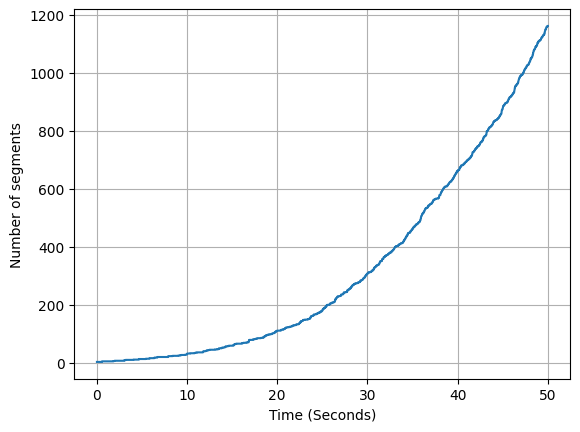

In [173]:
plt.plot(df['Time'],df['Number of segments'])
plt.ylabel('Number of segments')
plt.xlabel('Time (Seconds)')
plt.grid(True)

In [98]:
volume_per_segment = df['Total Mass'] / df['Number of segments']

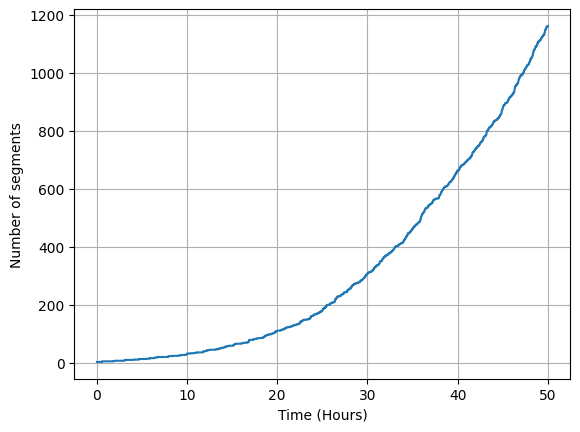

In [174]:
plt.plot(df['Time'],df['Number of segments'])
plt.ylabel('Number of segments')
plt.xlabel('Time (Hours)')
plt.grid(True)

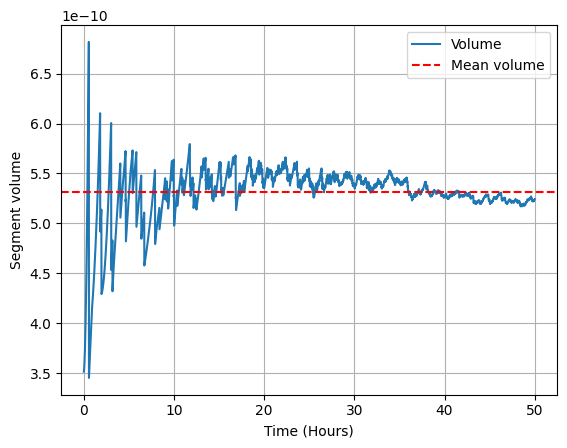

In [175]:
plt.plot(df['Time'],volume_per_segment,label='Volume')
plt.axhline(y=np.mean(volume_per_segment), color='r', linestyle='--', label='Mean volume')
plt.xlabel("Time (Hours)")
plt.ylabel('Segment volume')
plt.legend()
plt.grid(True)

maximum cylinder radius 2.5 μm

In [185]:
radius = 2.25e-4

In [186]:
segment_length = np.mean(volume_per_segment)/ (np.pi *radius*radius)#35e-4
print(segment_length)

0.003339543439992265


Random walk $R_g^2 = N l^2$

Linear chain $R_g^2 \approx \frac{Nl^2}{6} $

Closed gaussian ring $R_g^2 = \frac{N l^2}{12}$

Disk $R_g^2 = \frac{1}{A} \int_A \mathbf{r}^2 , dA = \frac{\frac{\pi R^4}{2}}{\pi R^2} = \frac{R^2}{2}$

Sphere $R_g = \sqrt{\frac{3}{5}} \cdot R = \sqrt{\frac{3}{5}} \cdot l N^{1/3}$

In [187]:
number_of_segments_per_monomer=1

In [188]:
b=number_of_segments_per_monomer*segment_length

df['Monomer Number']=df['Number of segments']/number_of_segments_per_monomer

df['Random walk']=(df['Number of segments'])*segment_length*segment_length
df['Linear chain']=df['Monomer Number']*b*b/6
df['Ring']=df['Monomer Number']*b*b/12

df['Disk']= (radius*segment_length/np.pi)*df['Number of segments']

df['Sphere']=(3/5)*np.power((3*radius*radius*segment_length/4),2/3)*np.power(df['Number of segments'],2/3)


df['GradDisk']= (radius*segment_length/np.pi)

df['GradSphere']=(2/5)*np.power((3*radius*radius*segment_length/4),2/3)*np.power(df['Number of segments'],-1/3)


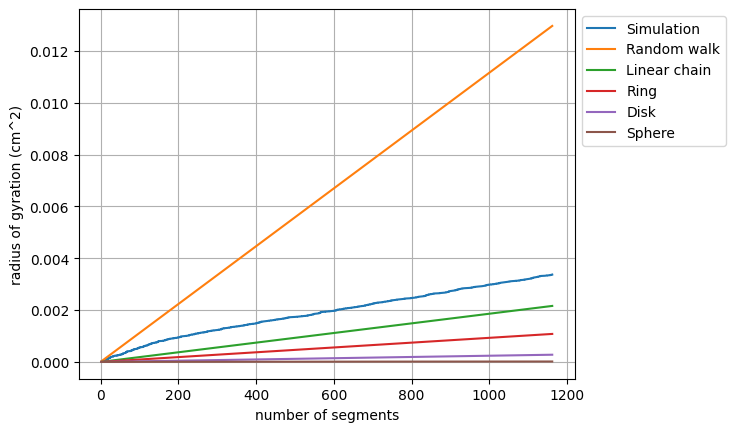

In [190]:
window_size=2
smoothed_gyration = np.convolve(df['Radius of Gyration (cm)']**2, np.ones(window_size) / window_size, mode='same')


plt.plot(df['Number of segments'],smoothed_gyration,label='Simulation')
plt.plot(df['Number of segments'],df['Random walk'],label='Random walk')
plt.plot(df['Number of segments'],df['Linear chain'],label='Linear chain')
plt.plot(df['Number of segments'],df['Ring'],label='Ring')

plt.plot(df['Number of segments'],df['Disk'],label='Disk')
plt.plot(df['Number of segments'],df['Sphere'],label='Sphere')

plt.xlabel('number of segments')
plt.ylabel('radius of gyration (cm^2)')
# plt.yscale('log')
# plt.xlim([0,1400])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



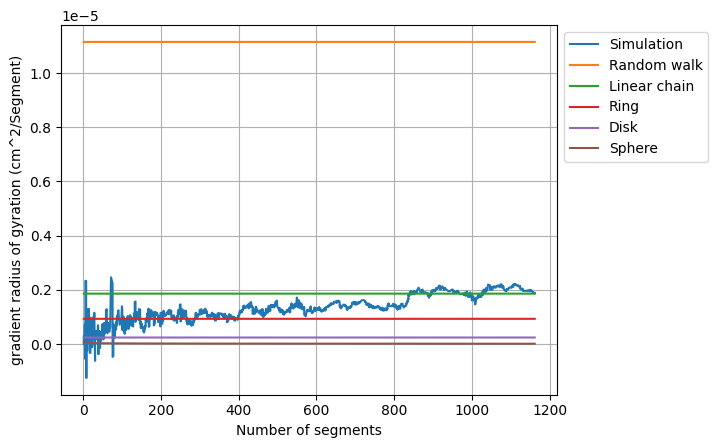

In [191]:

plt.plot(df['Number of segments'],np.gradient(df['Radius of Gyration (cm)']**2,label='Simulation')
plt.plot(df['Number of segments'],np.ones(len(df['Time']))*segment_length*segment_length,label='Random walk')
plt.plot(df['Number of segments'],np.ones(len(df['Time']))*b*b/6,label='Linear chain')
plt.plot(df['Number of segments'],np.ones(len(df['Time']))*b*b/12,label='Ring')

plt.plot(df['Number of segments'],df['GradDisk'],label='Disk')
plt.plot(df['Number of segments'],df['GradSphere'],label='Sphere')


plt.xlabel('Number of segments')
plt.ylabel('gradient radius of gyration (cm^2/Segment)')
# plt.ylim([0,8e-5])
plt.grid(True)
# plt.yscale('log')
# plt.xlim([0,1400])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()